## Nouns voting attendance
### By: [pbrianandj.eth](https://twitter.com/pbrianandj)

In [68]:
import seaborn as sns; sns.set()
from matplotlib import pyplot as plt
from python_graphql_client import GraphqlClient

# Instantiate the client with an endpoint.
client = GraphqlClient(endpoint="https://api.thegraph.com/subgraphs/name/nounsdao/nouns-subgraph")

In [69]:
# Create the query string and variables required for the request.
query = """
    {
  nouns(first: 1000, orderBy: id) {
    id,
    owner,
    votes {
        proposal {
            id
        },
        supportDetailed
    }
  }
}
"""
# Synchronous request
data = client.execute(query=query)

In [70]:
noun_to_vote_dict = {}

for noun in data['data']['nouns']:
    noun_to_vote_dict[noun['id']] = len(set([x['proposal']['id'] for x in noun['votes']]))

### Abstinence Club

In [71]:
no_votes = []
for noun, votes in noun_to_vote_dict.items():
    if votes == 0:
        no_votes.append(int(noun))
        
print(sorted(no_votes))


[4, 9, 11, 24, 25, 26, 31, 34, 37, 39, 41, 57, 58, 61, 64, 66, 67, 69, 74, 75, 82, 84, 85, 86, 88, 89, 96, 97, 111, 113, 122, 123, 124, 125, 127, 128, 129, 131, 132, 133, 135, 136, 137, 138, 139, 141, 142, 143, 144, 145, 146, 147]


## Histogram of proposals voted on per Noun

Text(0, 0.5, 'Number of Nouns')

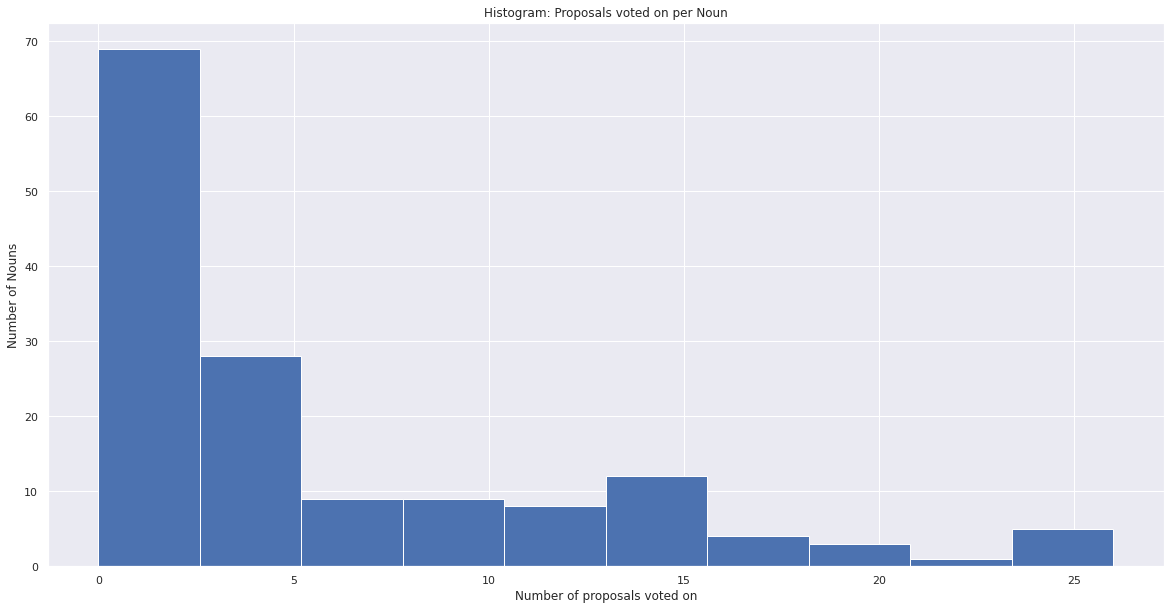

In [72]:
plt.figure(figsize=(20,10))
plt.hist(list(noun_to_vote_dict.values()))
plt.title('Histogram: Proposals voted on per Noun')
plt.xlabel('Number of proposals voted on')
plt.ylabel('Number of Nouns')